In [16]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import mnist
import numpy as np

model = load_model('model.keras')

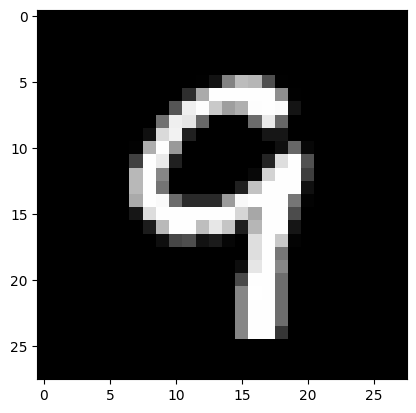

In [17]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

test_images = (test_images / 255) - 0.5
test_images = np.expand_dims(test_images, axis=3)

index = 150
end = 1

plt.imshow(test_images[index][:, :, 0], cmap='gray')
plt.show()

In [18]:
print(np.argmax(model.predict(test_images[index:index+end]), axis=1))

print(test_labels[index:index+end])

1/1 [==============================] - 0s 186ms/step
[9]
[9]


## Test the model with custom images

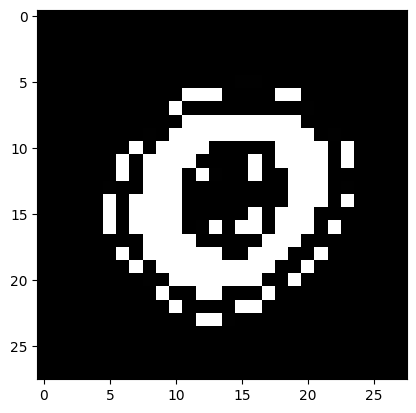

1/1 [==============================] - 0s 22ms/step
Prediction: 0 99.64%
Actual: 0 99.64%


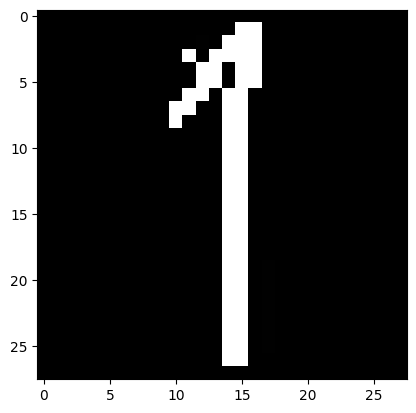

1/1 [==============================] - 0s 15ms/step
Prediction: 1 86.72%
Actual: 1 86.72%


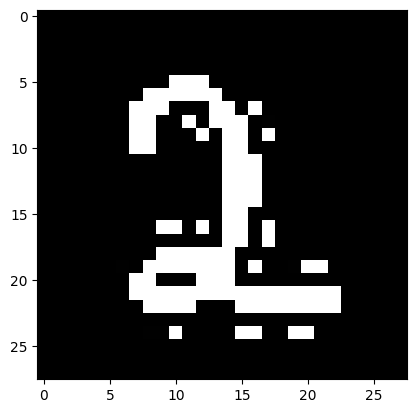

1/1 [==============================] - 0s 21ms/step
Prediction: 2 99.5%
Actual: 2 99.5%


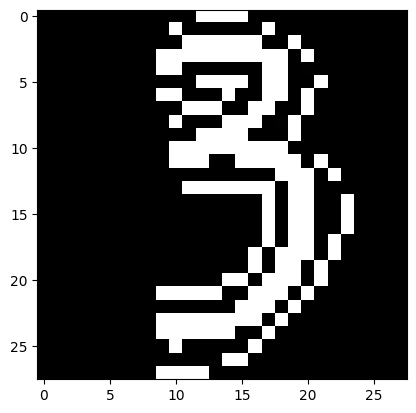

1/1 [==============================] - 0s 12ms/step
Prediction: 3 83.55%
Actual: 3 83.55%


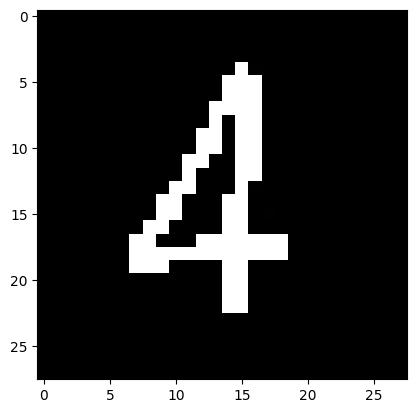

1/1 [==============================] - 0s 21ms/step
Prediction: 4 93.83%
Actual: 4 93.83%


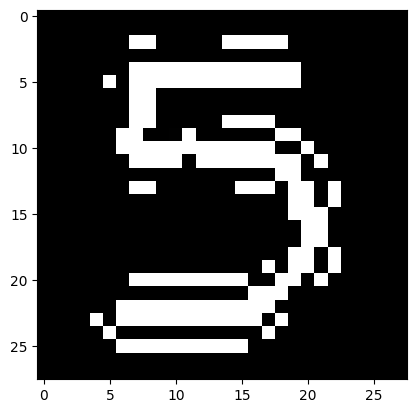

1/1 [==============================] - 0s 8ms/step
Prediction: 5 90.53%
Actual: 5 90.53%


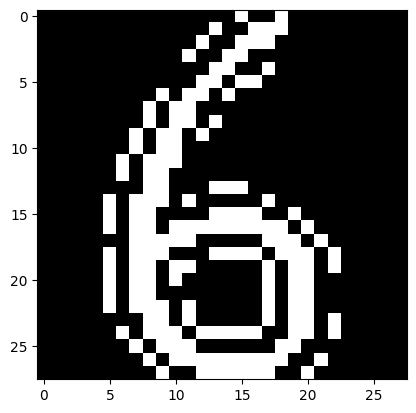

1/1 [==============================] - 0s 18ms/step
Prediction: 6 95.27%
Actual: 6 95.27%


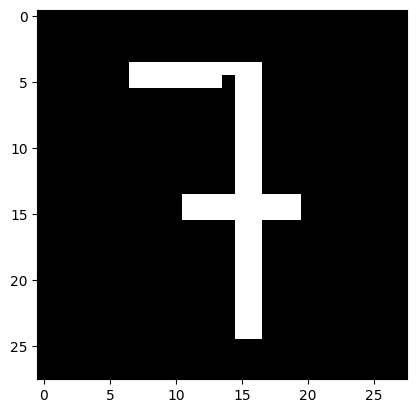

1/1 [==============================] - 0s 14ms/step
Prediction: 2 52.74%
Actual: 7 9.47%


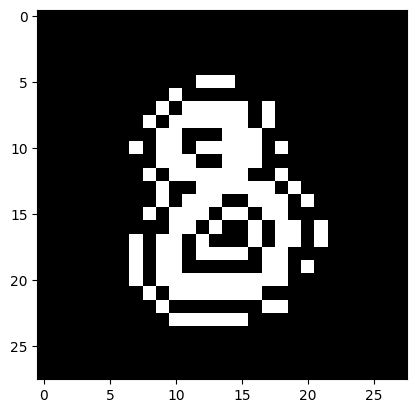

1/1 [==============================] - 0s 10ms/step
Prediction: 8 54.2%
Actual: 8 54.2%


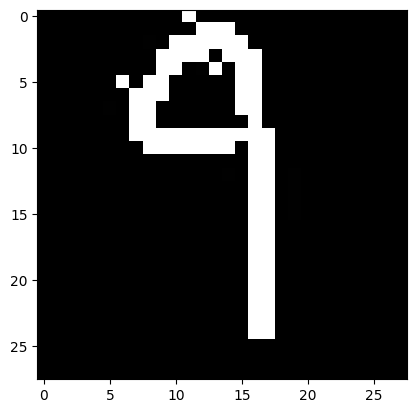

1/1 [==============================] - 0s 10ms/step
Prediction: 5 41.32%
Actual: 9 2.04%


In [35]:
from skimage import io, transform

for i in range(0, 10):
    image = io.imread('images/image_' + str(i) + '.png')
    
    if len(image.shape) > 2:
        image = image.mean(axis=2)
    
    # Resize the image to (28, 28)
    image_resized = transform.resize(image, (28, 28))
    
    for k in range(0, 28):
        for j in range(0, 28):
            if image_resized[k][j] > 1:
                image_resized[k][j] = 255
    
    plt.imshow(image_resized, cmap='gray')
    plt.show()
    
    # Normalize the pixel values to the range [-0.5, 0.5]
    image = (image_resized / 255) - 0.5
    
    # Reshape the image to match the model's input shape
    image_reshaped = image.reshape((1, 28, 28))
    
    probabilities = model.predict(image_reshaped)
    print("Prediction:", np.argmax(probabilities), str(round(np.max(probabilities) * 100, 2)) + "%")
    
    print("Actual:", i, str(round(probabilities[0][i] * 100, 2)) + "%")